# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fadila Muqtadaro Merry Hassani
- **Email:** m006d4kx1783@bangkit.academy
- **ID Dicoding:** fadila_muqtadaro_merry_hassani_m006d4kx1783_dxRV

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda berbagi berubah sepanjang waktu dan bagaimana faktor-faktor seperti cuaca, musim, dan hari dalam seminggu mempengaruhi penggunaan tersebut?
2. Bagaimana pola penggunaan sepeda berbagi berubah sepanjang hari, dan apakah terdapat perbedaan pola penggunaan antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [16]:
# Membaca dataset dari file csv
data_day = pd.read_csv('day.csv')
data_hour = pd.read_csv('hour.csv')
print(data_day.head())
print(data_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

### Assessing Data

In [17]:
# Menampilkan informasi umum dataset
print(data_day.info())
print(data_hour.info())

# Menampilkan beberapa baris pertama dataset
print(data_day.head())
print(data_hour.head())

# Mengecek jumlah data yang unik dalam kolom 'datetime'
print(data_day['dteday'].nunique())
print(data_hour['dteday'].nunique())

# Mengecek nilai yang hilang atau null
print(data_day.isnull().sum())
print(data_hour.isnull().sum())

# Mengecek duplikat data
print(data_day.duplicated().sum())
print(data_hour.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

### Cleaning Data

In [38]:
# Menggabungkan kedua dataset berdasarkan kolom 'dteday'
data = pd.concat([data_day, data_hour], axis=0)

# Menghilangkan kolom yang tidak diperlukan
columns_to_drop = ['instant', 'yr', 'holiday', 'weekday', 'casual', 'registered']
data = data.drop(columns_to_drop, axis=1)

# Menampilkan informasi tentang dataset setelah menghilangkan kolom
print(data.info())

# Menyimpan dataset yang sudah dibersihkan
data.to_csv('data_cleaned.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18110 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      18110 non-null  object 
 1   season      18110 non-null  int64  
 2   mnth        18110 non-null  int64  
 3   workingday  18110 non-null  int64  
 4   weathersit  18110 non-null  int64  
 5   temp        18110 non-null  float64
 6   atemp       18110 non-null  float64
 7   hum         18110 non-null  float64
 8   windspeed   18110 non-null  float64
 9   cnt         18110 non-null  int64  
 10  hr          17379 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.7+ MB
None


## Exploratory Data Analysis (EDA)

### Explore ...

<ipython-input-20-210959bb82ec>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,season,mnth,weathersit,temp,atemp,hum,windspeed,cnt,hr
season,1.000000,0.830429,-0.013339,0.312868,0.320265,0.152067,-0.151422,0.065255,-0.006117
mnth,0.830429,1.000000,0.006728,0.202395,0.208829,0.165924,-0.136889,0.044245,-0.005772
weathersit,-0.013339,0.006728,1.000000,-0.103192,-0.106050,0.422449,0.026488,-0.055426,-0.020203
temp,0.312868,0.202395,-0.103192,1.000000,0.987819,-0.064188,-0.026400,0.121870,0.137603
atemp,0.320265,0.208829,-0.106050,0.987819,1.000000,-0.046396,-0.065194,0.121342,0.133750
hum,0.152067,0.165924,0.422449,-0.064188,-0.046396,1.000000,-0.289238,-0.065214,-0.276498
windspeed,-0.151422,-0.136889,0.026488,-0.026400,-0.065194,-0.289238,1.000000,0.005491,0.137252
cnt,0.065255,0.044245,-0.055426,0.121870,0.121342,-0.065214,0.005491,1.000000,0.394071
hr,-0.006117,-0.005772,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071,1.000000


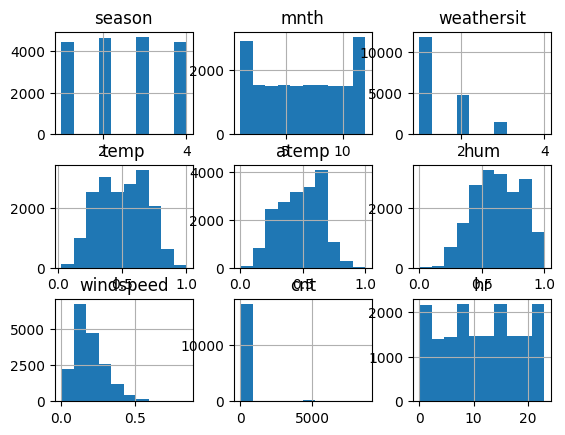

In [20]:
data.describe()
data.describe(include="all")
data.hist()
data.corr()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

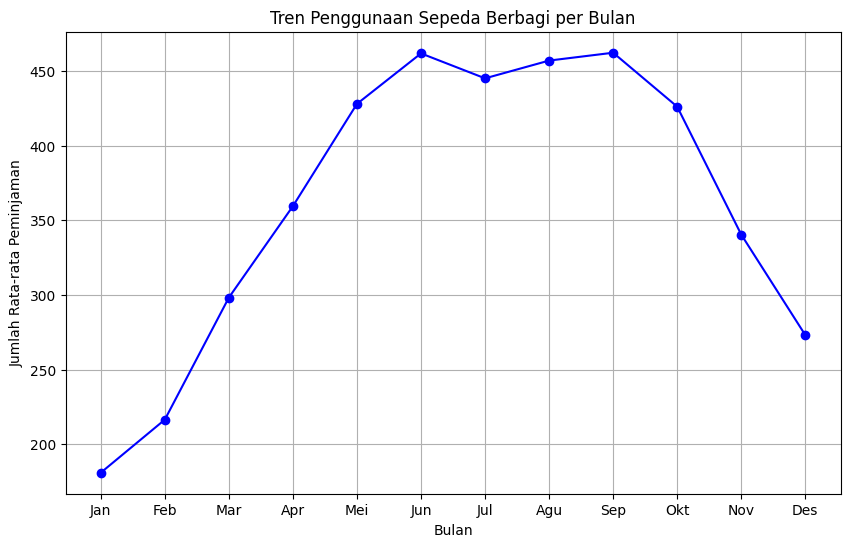

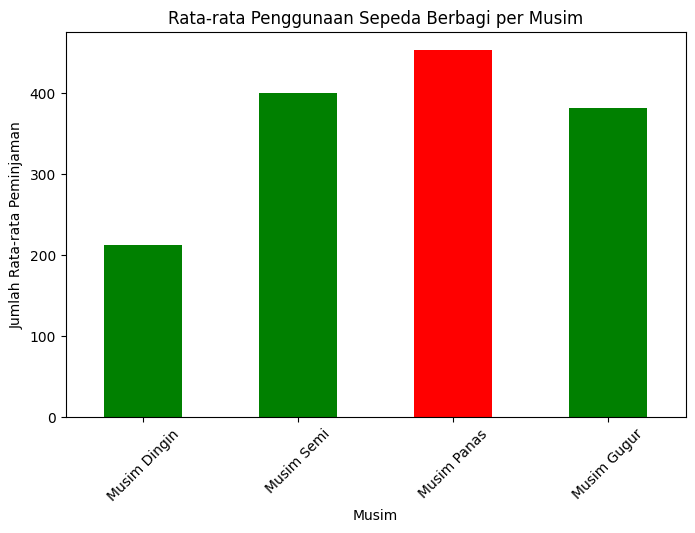

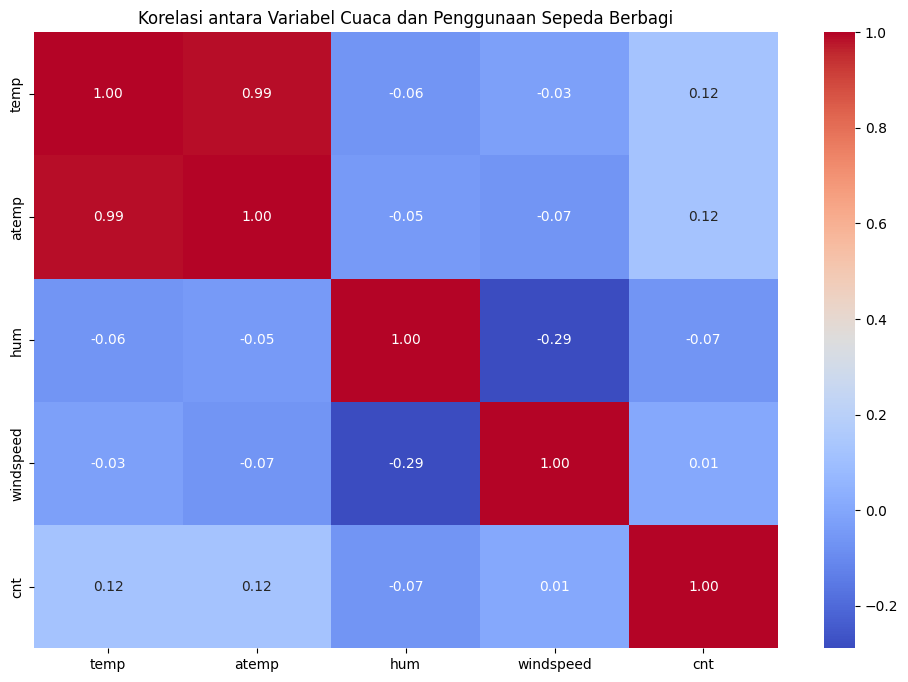

In [44]:
## Grafik Tren Penggunaan Sepeda Berdasarkan Bulan (mnth)
plt.figure(figsize=(10, 6))
monthly_usage = data.groupby('mnth')['cnt'].mean()
monthly_usage.plot(kind='line', marker='o', color='blue')
plt.title('Tren Penggunaan Sepeda Berbagi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rata-rata Peminjaman')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True)
plt.show()

# Grafik Tren Penggunaan Sepeda Berdasarkan Musim (season)
plt.figure(figsize=(8, 5))
max_season = seasonal_usage.idxmax()
colors = ['green' if season != max_season else 'red' for season in seasonal_usage.index]
seasonal_usage.plot(kind='bar', color=colors)
plt.title('Rata-rata Penggunaan Sepeda Berbagi per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Rata-rata Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Dingin','Musim Semi','Musim Panas','Musim Gugur'], rotation=45)
plt.show()

# Grafik Korelasi antara Variabel Cuaca dan Penggunaan Sepeda Berbagi
plt.figure(figsize=(12, 8))
weather_corr = data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Variabel Cuaca dan Penggunaan Sepeda Berbagi')
plt.show()


### Pertanyaan 2:

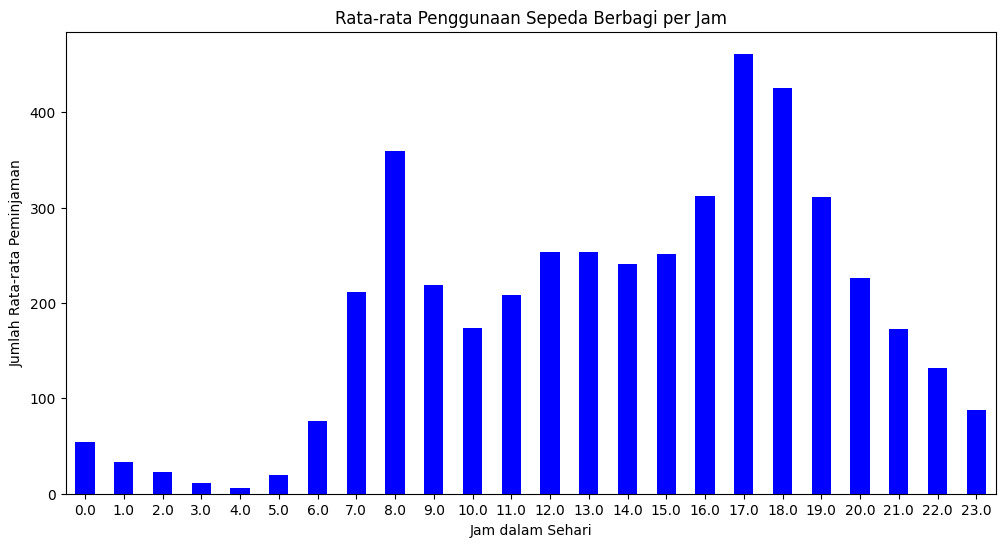

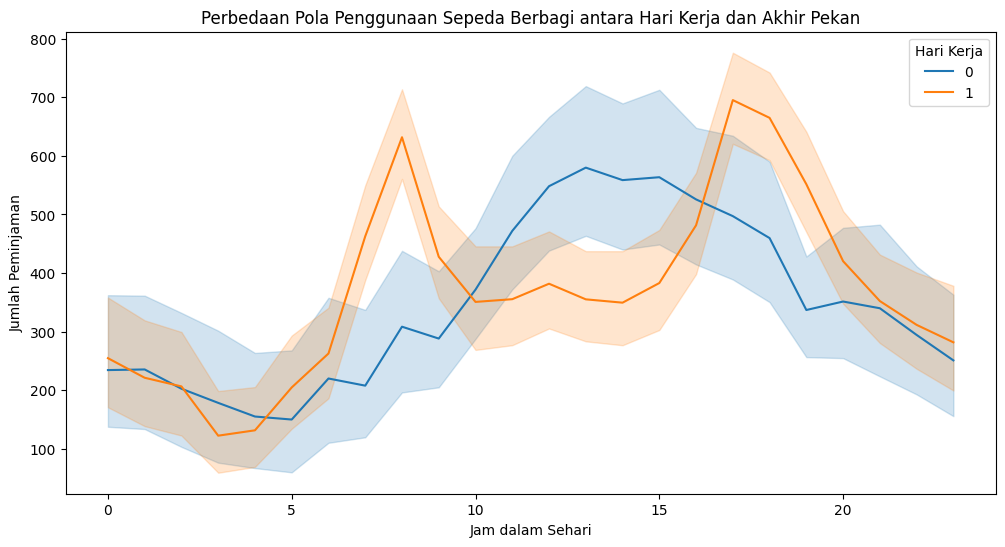

In [45]:
# Membuat grafik pola penggunaan sepeda berdasarkan jam dalam sehari
plt.figure(figsize=(12, 6))
hourly_usage = data.groupby('hr')['cnt'].mean()
hourly_usage.plot(kind='bar', color='blue')
plt.title('Rata-rata Penggunaan Sepeda Berbagi per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Rata-rata Peminjaman')
plt.xticks(rotation=0)
plt.show()

# Memvisualisasikan perbedaan pola penggunaan antara hari kerja dan akhir pekan
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='hr', y='cnt', hue='workingday')
plt.title('Perbedaan Pola Penggunaan Sepeda Berbagi antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.legend(title='Hari Kerja')
plt.show()


## Conclusion

1. Pola penggunaan sepeda berbagi berubah setiap musim, dengan tren meningkat selama musim semi dan musim panas dan turun selama musim gugur dan musim dingin. Tingkat penggunaan sepeda secara signifikan dipengaruhi oleh cuaca, terutama suhu. Hari-hari dengan suhu yang lebih hangat menunjukkan bahwa orang lebih suka beraktivitas di luar ruangan saat cuaca bagus. Kelembaban udara, kecepatan angin, dan suhu juga dapat mempengaruhi pola penggunaan, pengaruh ini mungkin tidak sebesar suhu. Penyedia layanan sepeda berbagi dapat menggunakan pola ini untuk mengoptimalkan strategi bisnis dan pemasaran mereka, yang mencakup mengubah penawaran sepeda dan beradaptasi dengan perubahan cuaca dan musim.
2. Selama hari kerja dan akhir pekan, pola penggunaan sepeda berbagi sangat berbeda. Selama hari kerja, penggunaan sepeda berbagi cenderung lebih tinggi pada pagi hari saat orang berangkat bekerja, dan kemudian menurun secara bertahap selama siang hari. Pada akhir pekan, bagaimanapun, pola penggunaan sepeda berbagi lebih rata sepanjang hari, dengan tingkat penggunaan relatif stabil dan puncak penggunaan terjadi pada siang hari. Dengan mengetahui perbedaan ini, penyedia layanan sepeda berbagi dapat mengatur alokasi sumber daya dan strategi pemasaran mereka untuk memenuhi kebutuhan dan preferensi pengguna terhadap layanan sepeda berbagi berdasarkan bagaimana aktivitas masyarakat berubah selama hari kerja dan akhir pekan.